<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW8_%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2_%D0%B8_%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%BE%D0%B2%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('glass.csv')

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **2. Проведите первичный анализ.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Тепловая карта')

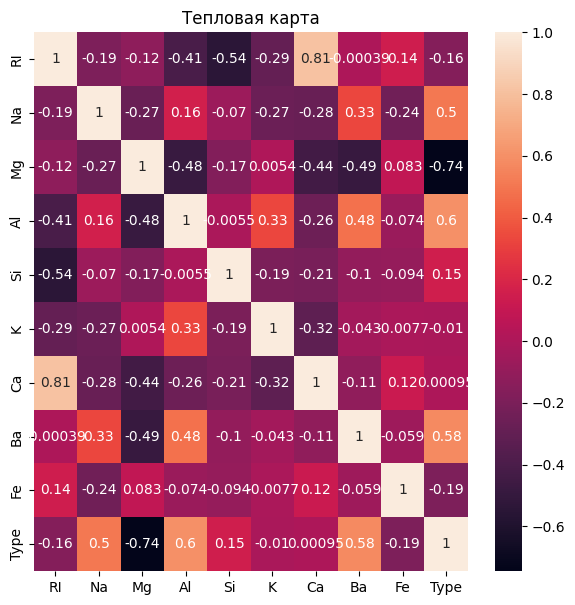

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot = True).set_title('Тепловая карта')

Text(0.5, 1.0, 'Ящик с усами по содержанию Алюминия')

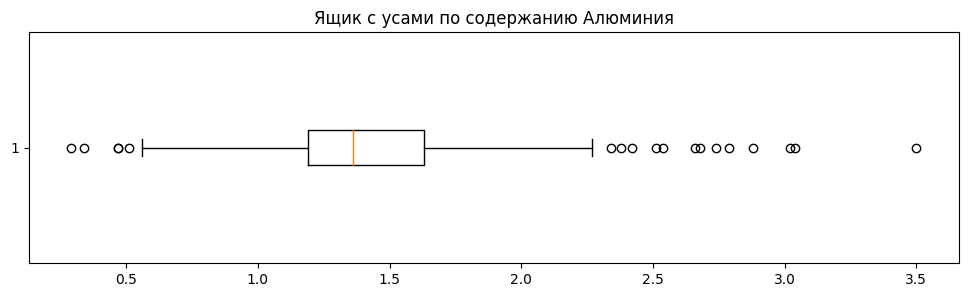

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.boxplot(df['Al'], vert=False)
plt.title("Ящик с усами по содержанию Алюминия")

Text(0.5, 1.0, 'Ящик с усами по содержанию кремния')

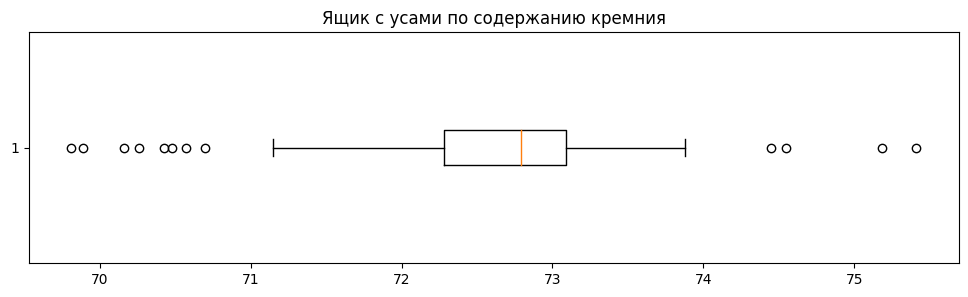

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.boxplot(df['Si'], vert=False)
plt.title("Ящик с усами по содержанию кремния")

Text(0.5, 1.0, 'Ящик с усами по содержанию кальция')

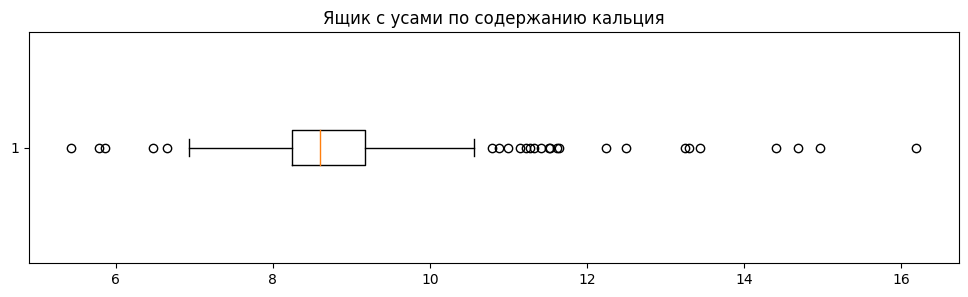

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
ax.boxplot(df['Ca'], vert=False)
plt.title("Ящик с усами по содержанию кальция")

**а) Проверьте количество записей для каждого класса. Сделайте вывод.**

In [ ]:
df.groupby(['Type'])['Type'].count()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

Выводы:
Имеется высокая скоррелированность целевое переменной с признаками: Al, Si, Ca. При это "ящик с усами показывает большое начилие выбросов для выше указанных признаков". Вероятно крайние значения и являются определяющими в выборе класса. Так же имеет место дисбаланас по количеству элеметов в классах

# **3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Type'], axis = 1)
y = df['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**

In [ ]:
#clf_rf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
resulst = clf_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, resulst)

0.8372093023255814

# **6. Обработайте выбросы в данных.**

**а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?**

<ipython-input-21-76b330c67905>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RI']).set_title('Распределение показателя преломления')


Text(0.5, 1.0, 'Распределение показателя преломления')

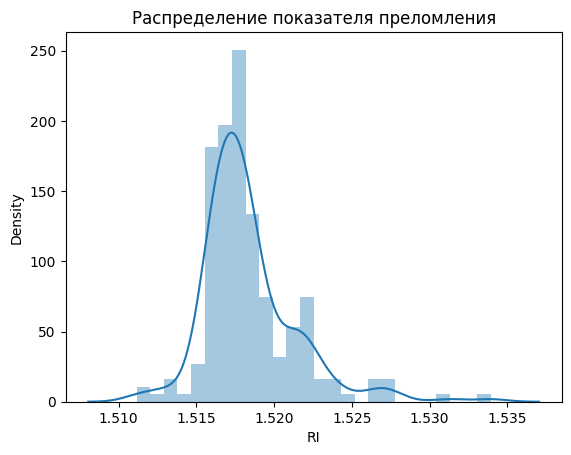

In [ ]:
sns.distplot(df['RI']).set_title('Распределение показателя преломления')

Text(0.5, 1.0, 'Распределение содержания натрия')

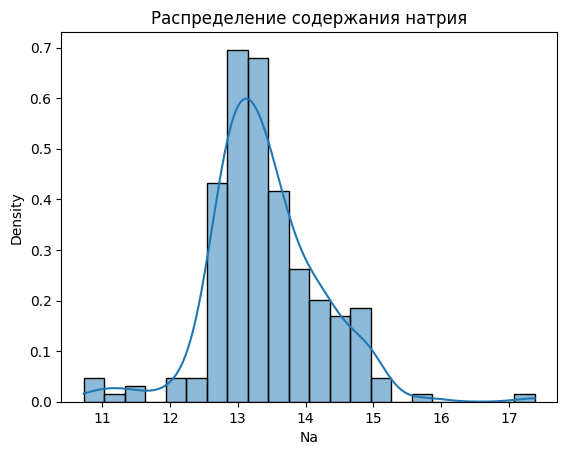

In [ ]:
sns.histplot(df["Na"], kde=True, stat="density").set_title('Распределение содержания натрия')

Text(0.5, 1.0, 'Распределение содержания магния')

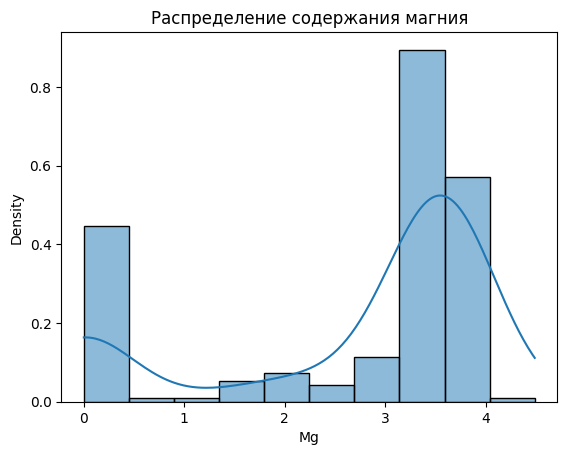

In [ ]:
sns.histplot(df["Mg"], kde=True, stat="density").set_title('Распределение содержания магния')

Text(0.5, 1.0, 'Распределение содержания алюминия')

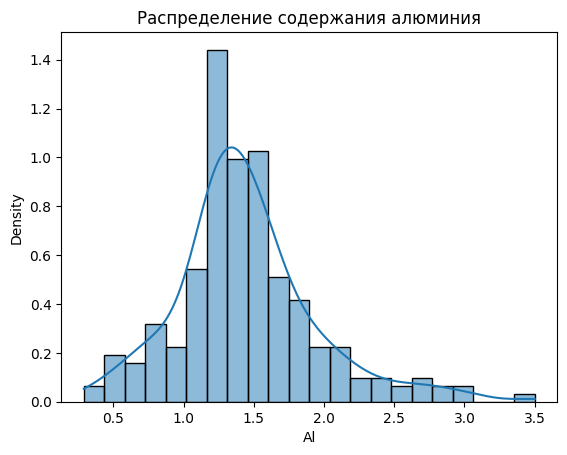

In [ ]:
sns.histplot(df["Al"], kde=True, stat="density").set_title('Распределение содержания алюминия')

Text(0.5, 1.0, 'Распределение содержания кремния')

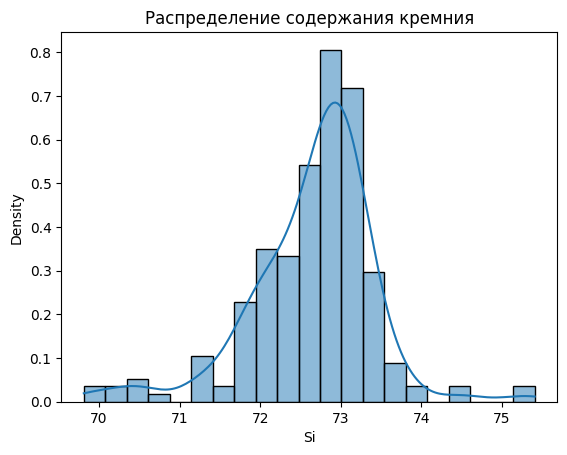

In [ ]:
sns.histplot(df["Si"], kde=True, stat="density").set_title('Распределение содержания кремния')

Text(0.5, 1.0, 'Распределение содержания калия')

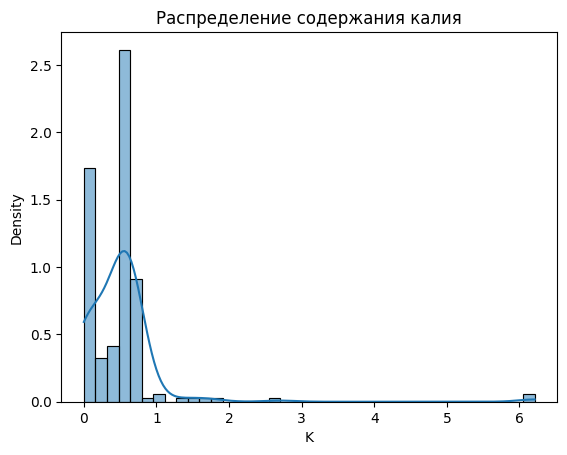

In [ ]:
sns.histplot(df["K"], kde=True, stat="density").set_title('Распределение содержания калия')

Text(0.5, 1.0, 'Распределение содержания кальция')

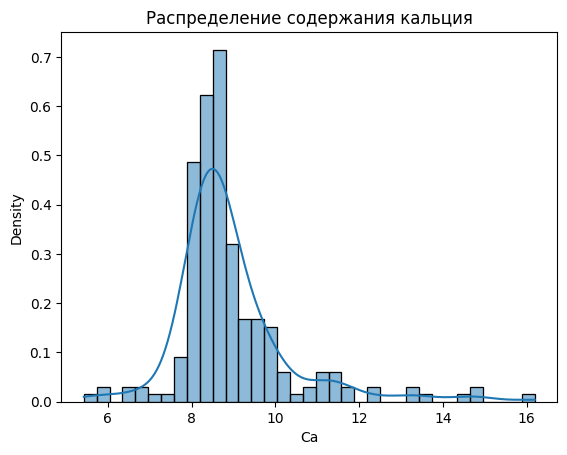

In [ ]:
sns.histplot(df["Ca"], kde=True, stat="density").set_title('Распределение содержания кальция')

Text(0.5, 1.0, 'Распределение содержания бария')

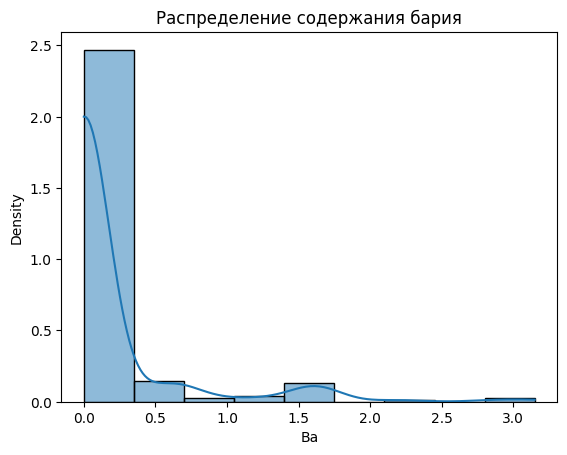

In [ ]:
sns.histplot(df["Ba"], kde=True, stat="density").set_title('Распределение содержания бария')

Text(0.5, 1.0, 'Распределение содержания Железа')

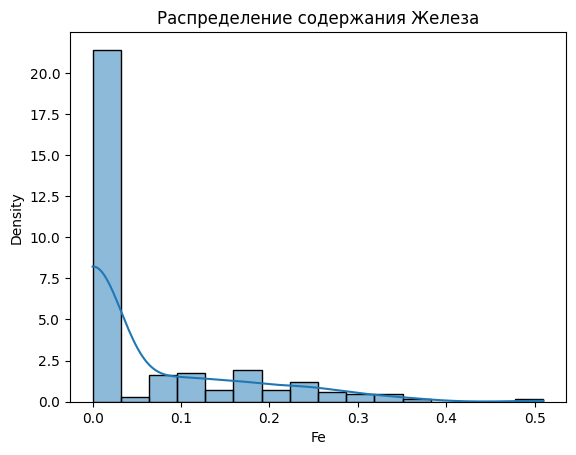

In [ ]:
sns.histplot(df["Fe"], kde=True, stat="density").set_title('Распределение содержания Железа')

Близко к нормальнома распределению следующие признаки: RI, Na, Al, Si, Ca.

**b) Исследуйте признаки на выбросы несколькими способами.**

**OneClassSVM**

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
model1 = OneClassSVM()

In [ ]:
model1 = model1.fit(X)

In [ ]:
model1.predict(X)

array([-1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
outliers1 = model1.predict(X)

**IsolationForest**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model2 = IsolationForest()

In [ ]:
model2 = model2.fit(X)

In [ ]:
model2.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [ ]:
outliers2 = model2.predict(X)

In [ ]:
df1 = df.copy()

**c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.**

In [ ]:
df1['OneClassSVM'] = outliers1

In [ ]:
df1['IsolationForest'] = outliers2

In [ ]:
df1.groupby(['OneClassSVM'])['OneClassSVM'].count() / df.shape[0] * 100

OneClassSVM
-1    50.0
 1    50.0
Name: OneClassSVM, dtype: float64

In [ ]:
df1.groupby(['IsolationForest'])['IsolationForest'].count() / df.shape[0] * 100

IsolationForest
-1    10.747664
 1    89.252336
Name: IsolationForest, dtype: float64

Без доп настроек OneClassSVM может удалить половину выборки.

В данном случае при базовых параметрах IsolationForest исключает лишь 10% выборки

In [ ]:
df1 = df1[df1['IsolationForest'] != -1]

In [ ]:
df1.shape[0]

191

# **7. Повторите п. 4, п. 5.**

In [ ]:
X1 = df1.drop(['Type', 'OneClassSVM'], axis = 1)
y1 = df1['Type']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
clf_rf1 = RandomForestClassifier(random_state=42)

In [ ]:
clf_rf1.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [ ]:
resulst1 = clf_rf1.predict(X1_test)

In [ ]:
accuracy_score(y1_test, resulst1)

0.8717948717948718

# **8. Сформулируйте выводы по проделанной работе.**

**а) Кратко опишите, какие преобразования были сделаны с данными.**

- Было запущены 2 модели проверки на выбросы OneClassSVM и IsolationForest

- IsolationForest классифицировал как выбросы относительно небольшое количество данных, поэтому было принято решение воспользоваться его результатами, то есть исключить около 10% процентов данных

**b) Сравните точность двух моделей.**

После чистки от выбросов метркика выросла с 0,84 до 0,87

**c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.**

Конечно нужно. Сейчас наглядно видно, что по итогам чистки качество модели выросло. Выбросы это аномальные значения, но присутствуя в выборке они искажают мешают принятию правильных решений. Самый главные минус, что без контроля можно исключить слишком много данных